# **Calibration of the Energy Deposit vs Incident Energy**

In [21]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

## Reading the files and the scoring tree

In [22]:
energy_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,5,10,20,40,50,60,70,80,100]


file_list=[]
for i in energy_list:
    file_list.append(ROOT.TFile(f"..//Outputs//Calibration//{i}GeV.root","READ"))  
    
    
tree_list=[]

for i in range(len(energy_list)):
    tree_list.append(file_list[i].Get("Scoring"))
    

## Creating the histograms and fitting the data with landau

In [23]:
hist_list=[]
mpv_list=[]
mpv_error_list=[]


for i in range(len(energy_list)):
    curr_hist = ROOT.TH1F(f"EnergyDeposit_{energy_list[i]}GeV",f"Incident Energy = {energy_list[i]}GeV",400,0,30)
    
    for events in tree_list[i]:
        float; edep = events.fEdep
        curr_hist.Fill(edep)   
    curr_hist.Fit("landau","Q0")
    mpv = curr_hist.GetFunction("landau").GetParameter(1)
    mpv_list.append(mpv)
    mpv_error = curr_hist.GetFunction("landau").GetParError(1)
    mpv_error_list.append(mpv_error)
    hist_list.append(curr_hist)
    
    
print(energy_list)

print(mpv_list)    

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10, 20, 40, 50, 60, 70, 80, 100]
[9.759905897497209, 8.156075763637253, 7.757748208372341, 7.598610980627223, 7.51582377894474, 7.468615377185338, 7.447043174767488, 7.422550626711454, 7.437397221999467, 7.43671049002635, 7.426205839327659, 7.475508501016594, 7.485255481170156, 7.516201156082632, 7.498089433327998, 7.5088805324763115, 7.510174436114705, 7.528583515290326, 7.505794743969723, 7.52509899941298]


## Plotting the calibration curve

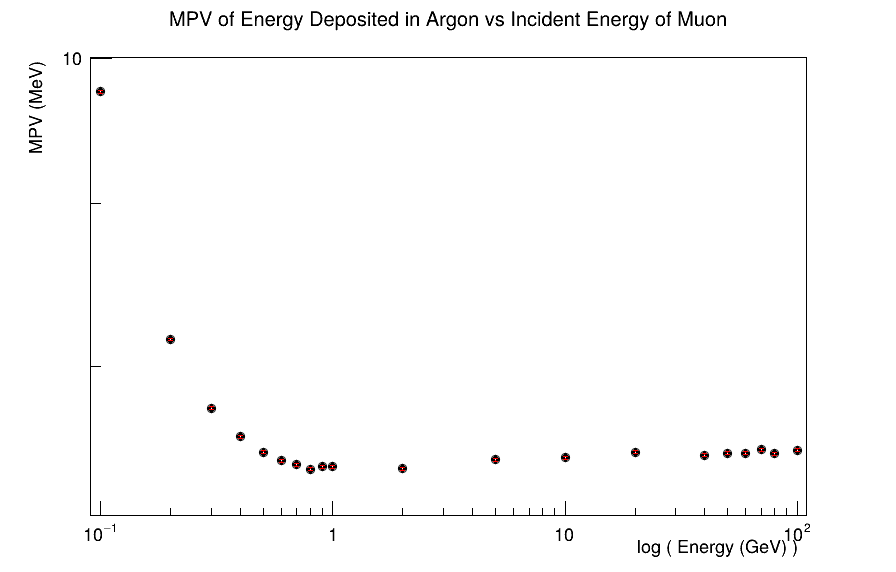

In [24]:
canvas = True
canvas = ROOT.TCanvas("canvas", "canvas", 900, 600)

graph = ROOT.TGraphErrors(len(energy_list), np.array(energy_list), np.array(mpv_list), np.zeros(len(energy_list)), np.array(mpv_error_list))
graph.SetMarkerStyle(20)
graph.SetMarkerSize(1)
graph.SetMarkerColor(1) 
graph.SetLineColor(1)    
graph.Draw("AP")


error_graph = ROOT.TGraphAsymmErrors(len(energy_list), np.array(energy_list), np.array(mpv_list), np.zeros(len(energy_list)), np.zeros(len(energy_list)), np.array(mpv_error_list), np.array(mpv_error_list))
error_graph.SetLineColor(2)  # Error bar color red
error_graph.SetFillColor(0)  # No fill color
error_graph.SetMarkerColor(0)  # No marker color
error_graph.Draw("P")
graph.SetTitle("MPV of Energy Deposited in Argon vs Incident Energy of Muon")
graph.GetXaxis().SetTitle("log ( Energy (GeV) )")
graph.GetYaxis().SetTitle("MPV (MeV)")
canvas.SetLogx()
# canvas.SetGrid()
canvas.Draw()



'''
Saving the file as a root file
'''
cal_res = ROOT.TFile("calibration_results.root","RECREATE")
graph.Write()
cal_res.Close()